# k 均值聚类教程

### 0. 依赖

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 调用sklearn中的方法直接生成数据
from sklearn.datasets.samples_generator import make_blobs

### 1. 数据加载和预处理

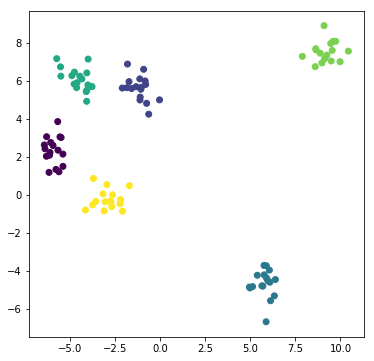

In [2]:
x, y = make_blobs(n_samples=100, centers=6, random_state=1234, cluster_std=0.6)
#print(x,y)
plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

### 2. 算法实现

In [10]:
from scipy.spatial.distance import cdist

class K_Means():
    # 初始化，参数k、迭代次数、初始中心点
    def __init__(self, k_cluster=6, max_iter=1000, centroids=[]):
        self.k_cluster = k_cluster
        self.max_iter = max_iter
        self.centroids = np.array(centroids, dtype=np.float)
    
    def fit(self,data):
        # 如果没有中心点，在data中随机选取作为初始中心点
        if(self.centroids.shape==(0,)):
            self.centroids = data[np.random.randint(0,data.shape[0],self.k_cluster),:]
            
        for i in range(self.max_iter):
            # 计算距离矩阵，记录所有数据点和所有中心点的距离，算出来一个100*6的矩阵
            distances = cdist(data, self.centroids)
            
            # 选取距离最近的centroids质心，做分类
            c_index = np.argmin(distances, axis=1)
            
            # 计算每类数据的均值，就是分类之后新的质心
            for i in range(self.k_cluster):
                # 只对有效的类别做计算
                if i in c_index:
                    self.centroids[i] = np.mean(data[c_index==i],axis=0)
    
    def predict(self, test):
        distances = cdist(test, self.centroids)
            
        # 选取距离最近的中心点，做分类
        c_index = np.argmin(distances, axis=1)
        return c_index

### 3. 测试

[5 1]


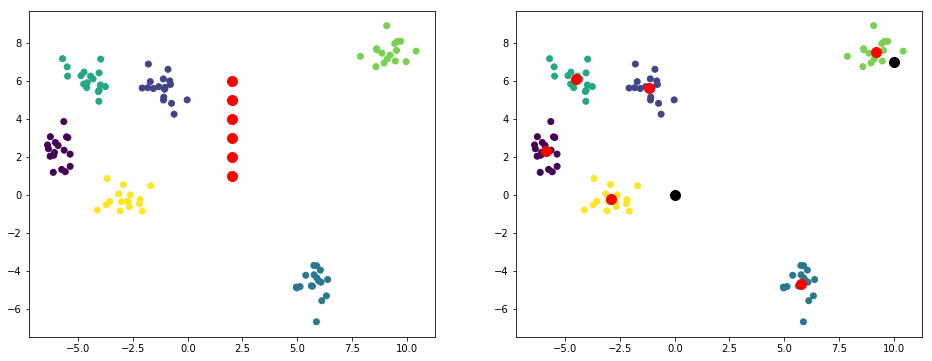

In [16]:
def plotKMeans(x, y, centroids, subplot):
    plt.subplot(subplot)
    plt.scatter(x[:,0], x[:,1],c=y)
    plt.scatter(centroids[:,0],centroids[:,1],s=100,c='r')

kmeans = K_Means(centroids = np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))

plt.figure(figsize=(16,6))
plotKMeans(x, y, kmeans.centroids, 121)

# 开始聚类
kmeans.fit(x)

plotKMeans(x, y, kmeans.centroids, 122)

# 做出预测
x_new = np.array([[10,7],[0,0]])
y_pred = kmeans.predict(x_new)

print(y_pred)

plt.scatter(x_new[:,0],x_new[:,1],s=100,c="black")